<h1>QRT CHALLENGE</h1>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import lightgbm as lgbm

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_regression


import lightgbm as lgbm

<h2>I - INTRO</h2> 

In [2]:
X_train = pd.read_csv("C:/Users/Ilias/documents/cours_mines/kaggle/qrt datathon/X_train.csv",index_col='ROW_ID')
X_test = pd.read_csv('C:/Users/Ilias/documents/cours_mines/kaggle/qrt datathon/X_test.csv')

y_train = pd.read_csv('C:/Users/Ilias/documents/cours_mines/kaggle/qrt datathon/y_train.csv',index_col='ROW_ID')
sample_submission = pd.read_csv('sample_submission.csv',index_col='ROW_ID')
X_train

,TS,ALLOCATION,RET_20,RET_19,RET_18,RET_17,RET_16,RET_15,RET_14,RET_13,...,SIGNED_VOLUME_9,SIGNED_VOLUME_8,SIGNED_VOLUME_7,SIGNED_VOLUME_6,SIGNED_VOLUME_5,SIGNED_VOLUME_4,SIGNED_VOLUME_3,SIGNED_VOLUME_2,SIGNED_VOLUME_1,AVG_DAILY_TURNOVER
ROW_ID,,,,,,,,,,,,,,,,,,,,,
0,DATE_0001,ALLOCATION_01,-0.002477,0.004826,0.005374,-0.001688,-0.000152,-0.000685,-0.002217,0.001911,...,-1.016154,-1.011450,-1.171714,-0.729594,-1.208138,-1.215123,-0.848346,-0.642461,-0.203447,0.054324
1,DATE_0001,ALLOCATION_02,0.006863,-0.005265,-0.004249,0.002686,-0.002638,0.003056,0.002712,-0.005269,...,0.896098,1.429419,0.946527,1.059767,0.988289,0.956915,0.943508,0.124168,0.081083,0.015669
2,DATE_0001,ALLOCATION_03,-0.005535,0.008541,0.005360,-0.002491,0.004679,-0.000848,-0.007197,0.006792,...,-0.889142,-0.939257,-0.980370,-0.863196,-0.839662,-0.882459,-1.172723,-0.863937,-0.695998,0.057961
3,DATE_0001,ALLOCATION_04,0.003178,-0.001352,-0.004051,-0.001841,-0.005659,0.000627,0.006686,0.001804,...,-1.788263,-0.807971,-1.587942,-0.042083,-1.356051,-1.007006,-1.821786,-0.455660,-1.090989,0.096004
4,DATE_0001,ALLOCATION_05,0.003359,-0.003349,-0.005460,0.000416,-0.003533,0.000913,0.005088,-0.003043,...,0.326148,1.013100,0.362135,0.774670,0.370484,-0.132558,-0.417645,-1.284208,-1.382900,0.005816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180240,DATE_2773,ALLOCATION_61,0.002236,-0.000891,0.001505,-0.001188,0.001114,-0.000919,-0.002004,0.001065,...,-0.925438,-1.425750,-1.298842,-1.180319,-1.028781,-1.179061,-0.079851,-0.417799,-0.846177,0.266275
180241,DATE_2773,ALLOCATION_62,0.001811,0.003863,-0.000609,0.000014,-0.000569,0.002425,-0.004095,-0.005187,...,1.016520,1.052250,1.113896,1.124733,1.294520,1.393331,-0.004149,0.813832,0.985705,0.013269
180242,DATE_2773,ALLOCATION_63,0.001063,-0.000599,0.001783,-0.001443,0.001426,-0.001503,0.000086,0.002414,...,-0.964934,-1.049097,-1.000392,-1.078183,-1.125200,-1.312296,-0.096095,-0.712589,-0.998627,0.148806


In [1]:
train = y_train.merge(X_train, on="ROW_ID", how="right")
cols = [c for c in train.columns if c != "target"] + ["target"]
train = train[cols]

NameError: name 'y_train' is not defined

In [4]:
train["target_encoded"] = train.target 
nan_ratio = train.isna().sum()
print(nan_ratio)

TS                    0
ALLOCATION            0
RET_20                0
RET_19                0
RET_18                0
RET_17                0
RET_16                0
RET_15                0
RET_14                0
RET_13                0
RET_12                0
RET_11                0
RET_10                0
RET_9                 0
RET_8                 0
RET_7                 0
RET_6                 0
RET_5                 0
RET_4                 0
RET_3                 0
RET_2                 0
RET_1                 0
SIGNED_VOLUME_20      0
SIGNED_VOLUME_19      0
SIGNED_VOLUME_18      0
SIGNED_VOLUME_17      0
SIGNED_VOLUME_16      0
SIGNED_VOLUME_15      0
SIGNED_VOLUME_14      0
SIGNED_VOLUME_13      0
SIGNED_VOLUME_12      0
SIGNED_VOLUME_11      0
SIGNED_VOLUME_10      0
SIGNED_VOLUME_9       0
SIGNED_VOLUME_8       0
SIGNED_VOLUME_7       0
SIGNED_VOLUME_6       0
SIGNED_VOLUME_5       0
SIGNED_VOLUME_4       0
SIGNED_VOLUME_3       0
SIGNED_VOLUME_2       0
SIGNED_VOLUME_1 

In [ ]:
train["target_encoded"] = (train["target_encoded"] > 0).astype(int)
train.head()
# car je voulais faire une classification au départ

NameError: name 'train' is not defined

In [ ]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

X = train.copy()
y = X.pop("target")

# ici je calcule la mutual information score de chaque feature
mi_scores = make_mi_scores(X, y)
mi_scores

target_encoded        0.693128
TS                    0.168221
ALLOCATION            0.034562
RET_1                 0.011321
RET_6                 0.011055
RET_2                 0.011042
RET_4                 0.009837
RET_7                 0.009361
RET_5                 0.009124
RET_8                 0.008915
RET_10                0.008847
RET_3                 0.007739
RET_14                0.006809
RET_18                0.006651
RET_9                 0.006289
RET_12                0.006024
AVG_DAILY_TURNOVER    0.005943
RET_15                0.005427
SIGNED_VOLUME_12      0.005012
RET_20                0.004802
RET_17                0.004620
RET_13                0.004588
SIGNED_VOLUME_20      0.004441
RET_16                0.004379
SIGNED_VOLUME_15      0.004167
SIGNED_VOLUME_17      0.004019
RET_11                0.003706
SIGNED_VOLUME_3       0.003368
SIGNED_VOLUME_16      0.003217
SIGNED_VOLUME_10      0.003141
RET_19                0.002984
SIGNED_VOLUME_6       0.002589
SIGNED_V

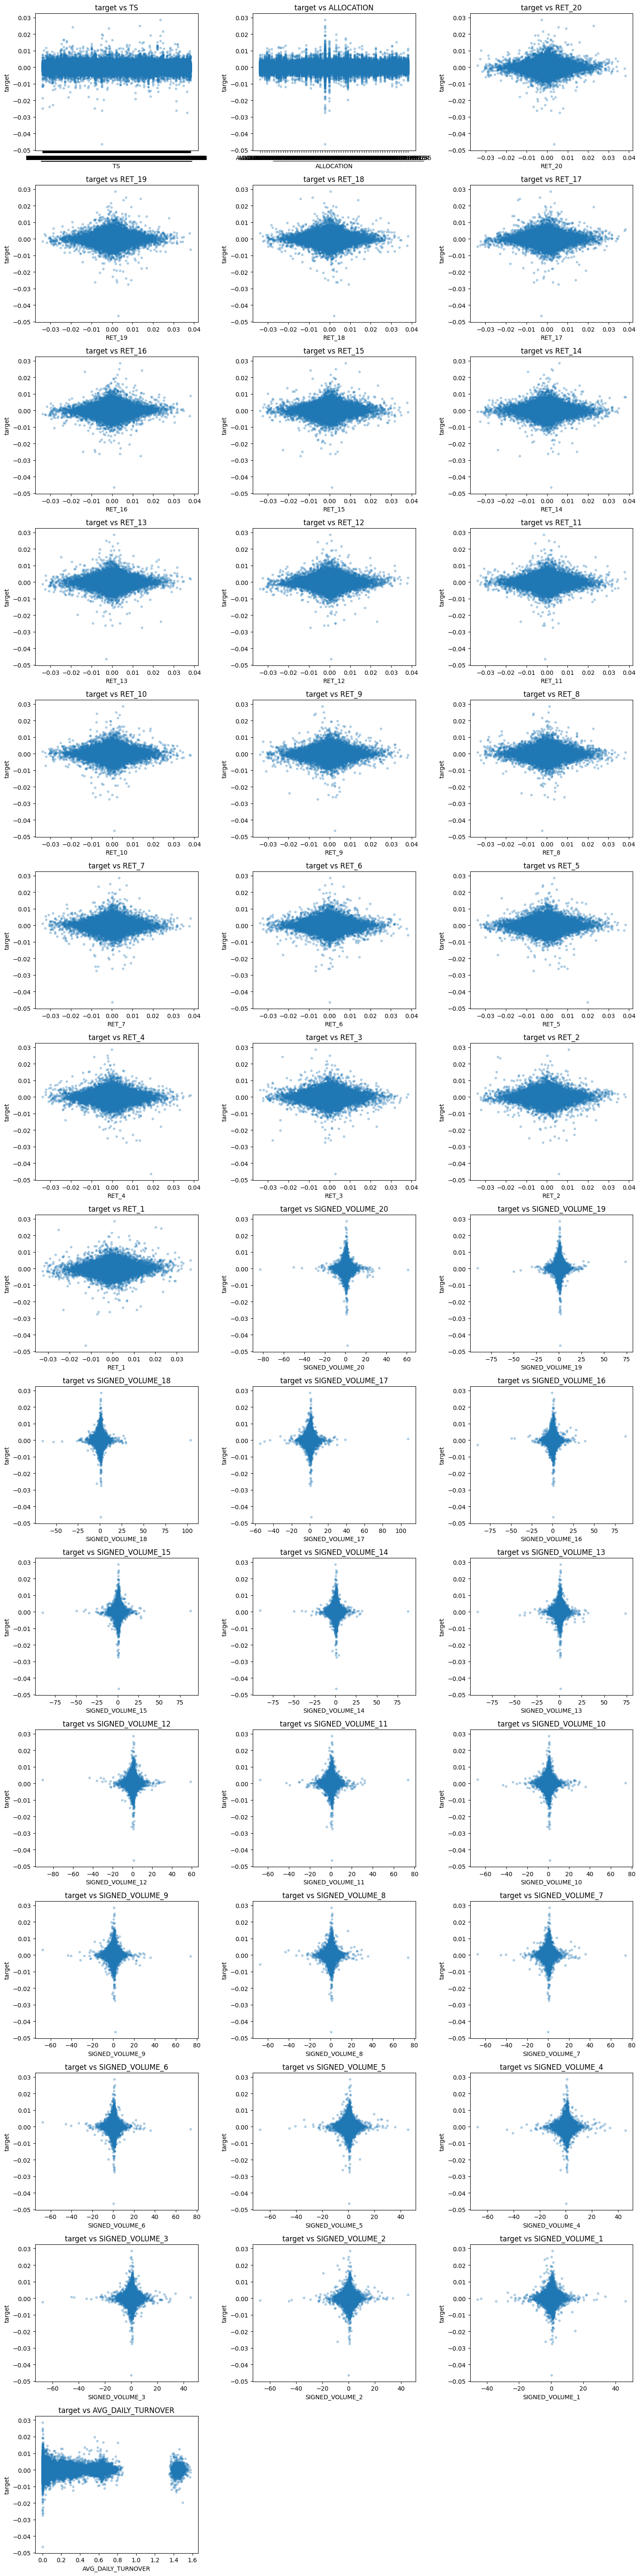

In [7]:
import matplotlib.pyplot as plt
import math

n_cols = 3
n_rows = math.ceil(len(train.columns[:-2]) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten() 

for i, col in enumerate(train.columns[:-2]):
    ax = axes[i]
    ax.scatter(train[col], train["target"], s=10, alpha=0.3)
    ax.set_xlabel(col)
    ax.set_ylabel("target")
    ax.set_title(f"target vs {col}")

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


Tout le temps une symétrie par rapport à (0,0), ça va pas trop nous aider

In [8]:
train.columns

Index(['TS', 'ALLOCATION', 'RET_20', 'RET_19', 'RET_18', 'RET_17', 'RET_16',
       'RET_15', 'RET_14', 'RET_13', 'RET_12', 'RET_11', 'RET_10', 'RET_9',
       'RET_8', 'RET_7', 'RET_6', 'RET_5', 'RET_4', 'RET_3', 'RET_2', 'RET_1',
       'SIGNED_VOLUME_20', 'SIGNED_VOLUME_19', 'SIGNED_VOLUME_18',
       'SIGNED_VOLUME_17', 'SIGNED_VOLUME_16', 'SIGNED_VOLUME_15',
       'SIGNED_VOLUME_14', 'SIGNED_VOLUME_13', 'SIGNED_VOLUME_12',
       'SIGNED_VOLUME_11', 'SIGNED_VOLUME_10', 'SIGNED_VOLUME_9',
       'SIGNED_VOLUME_8', 'SIGNED_VOLUME_7', 'SIGNED_VOLUME_6',
       'SIGNED_VOLUME_5', 'SIGNED_VOLUME_4', 'SIGNED_VOLUME_3',
       'SIGNED_VOLUME_2', 'SIGNED_VOLUME_1', 'AVG_DAILY_TURNOVER', 'target',
       'target_encoded'],
      dtype='object')

<h2>II - Analyse des données</h2>

In [9]:
train.info()
train.describe().T
train.isna().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
Index: 180245 entries, 0 to 180244
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TS                  180245 non-null  object 
 1   ALLOCATION          180245 non-null  object 
 2   RET_20              180245 non-null  float64
 3   RET_19              180245 non-null  float64
 4   RET_18              180245 non-null  float64
 5   RET_17              180245 non-null  float64
 6   RET_16              180245 non-null  float64
 7   RET_15              180245 non-null  float64
 8   RET_14              180245 non-null  float64
 9   RET_13              180245 non-null  float64
 10  RET_12              180245 non-null  float64
 11  RET_11              180245 non-null  float64
 12  RET_10              180245 non-null  float64
 13  RET_9               180245 non-null  float64
 14  RET_8               180245 non-null  float64
 15  RET_7               180245 non-null  fl

TS                    0
SIGNED_VOLUME_19      0
SIGNED_VOLUME_17      0
SIGNED_VOLUME_16      0
SIGNED_VOLUME_15      0
SIGNED_VOLUME_14      0
SIGNED_VOLUME_13      0
SIGNED_VOLUME_12      0
SIGNED_VOLUME_11      0
SIGNED_VOLUME_10      0
SIGNED_VOLUME_9       0
SIGNED_VOLUME_8       0
SIGNED_VOLUME_7       0
SIGNED_VOLUME_6       0
SIGNED_VOLUME_5       0
SIGNED_VOLUME_4       0
SIGNED_VOLUME_3       0
SIGNED_VOLUME_2       0
SIGNED_VOLUME_1       0
AVG_DAILY_TURNOVER    0
target                0
SIGNED_VOLUME_18      0
SIGNED_VOLUME_20      0
ALLOCATION            0
RET_1                 0
RET_20                0
RET_19                0
RET_18                0
RET_17                0
RET_16                0
RET_15                0
RET_14                0
RET_13                0
RET_12                0
RET_11                0
RET_10                0
RET_9                 0
RET_8                 0
RET_7                 0
RET_6                 0
RET_5                 0
RET_4           

In [10]:
train["target"].describe()

count    180245.000000
mean          0.000012
std           0.001609
min          -0.046499
25%          -0.000830
50%           0.000009
75%           0.000844
max           0.028676
Name: target, dtype: float64

In [11]:
train["target_encoded"].value_counts(normalize=True)

target_encoded
1    0.502771
0    0.497229
Name: proportion, dtype: float64

<Axes: xlabel='TS'>

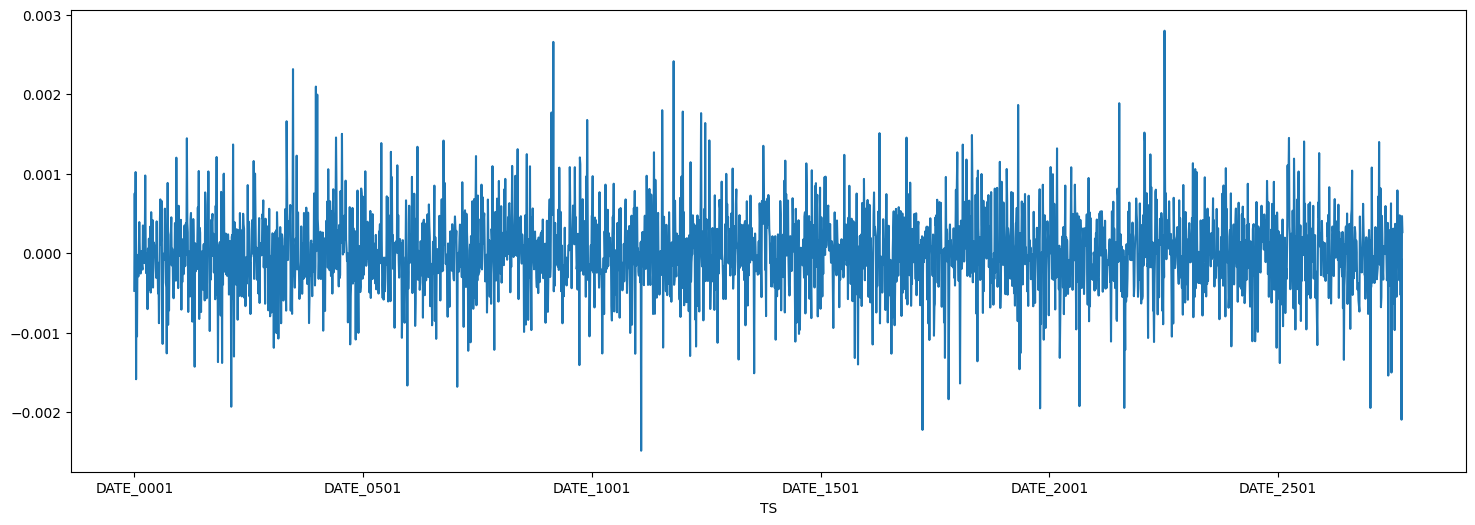

In [12]:
train.groupby("TS")["target"].mean().plot(figsize=(18,6))


In [13]:
corr_rets = train[[f"RET_{i}" for i in range(1, 21)]].corr()
corr_vols = train[[f"SIGNED_VOLUME_{i}" for i in range(1, 21)]].corr()


<Axes: >

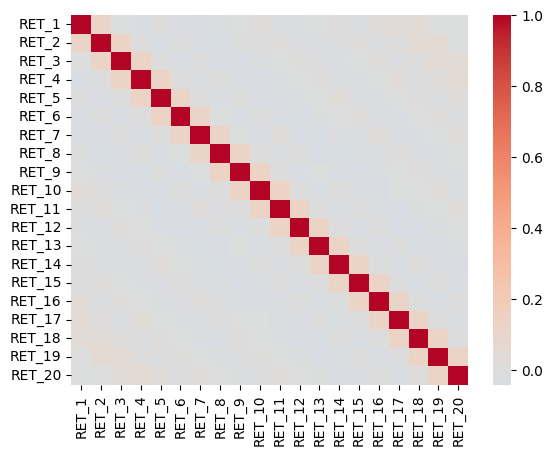

In [14]:
sns.heatmap(corr_rets, cmap="coolwarm", center=0)

<Axes: >

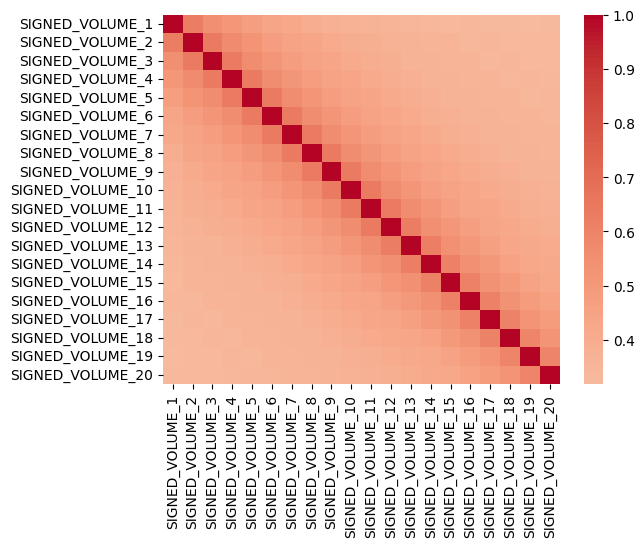

In [15]:
sns.heatmap(corr_vols, cmap="coolwarm", center=0)

In [57]:
num_cols = train.select_dtypes(include=[np.number]).columns
features = [c for c in num_cols if c not in ("target", "target_encoded")]
RET_features = [f'RET_{i}' for i in range(1,21)]
SV_features = [f'SIGNED_VOLUME_{i}' for i in range(1,21)]

print(features)

['RET_20', 'RET_19', 'RET_18', 'RET_17', 'RET_16', 'RET_15', 'RET_14', 'RET_13', 'RET_12', 'RET_11', 'RET_10', 'RET_9', 'RET_8', 'RET_7', 'RET_6', 'RET_5', 'RET_4', 'RET_3', 'RET_2', 'RET_1', 'SIGNED_VOLUME_20', 'SIGNED_VOLUME_19', 'SIGNED_VOLUME_18', 'SIGNED_VOLUME_17', 'SIGNED_VOLUME_16', 'SIGNED_VOLUME_15', 'SIGNED_VOLUME_14', 'SIGNED_VOLUME_13', 'SIGNED_VOLUME_12', 'SIGNED_VOLUME_11', 'SIGNED_VOLUME_10', 'SIGNED_VOLUME_9', 'SIGNED_VOLUME_8', 'SIGNED_VOLUME_7', 'SIGNED_VOLUME_6', 'SIGNED_VOLUME_5', 'SIGNED_VOLUME_4', 'SIGNED_VOLUME_3', 'SIGNED_VOLUME_2', 'SIGNED_VOLUME_1', 'AVG_DAILY_TURNOVER']


C:\Users\Ilias\AppData\Local\Temp\ipykernel_16096\1114005182.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = train.loc[valid].groupby(bins)["target"].mean()
C:\Users\Ilias\AppData\Local\Temp\ipykernel_16096\1114005182.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = train.loc[valid].groupby(bins)["target"].mean()
C:\Users\Ilias\AppData\Local\Temp\ipykernel_16096\1114005182.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future de

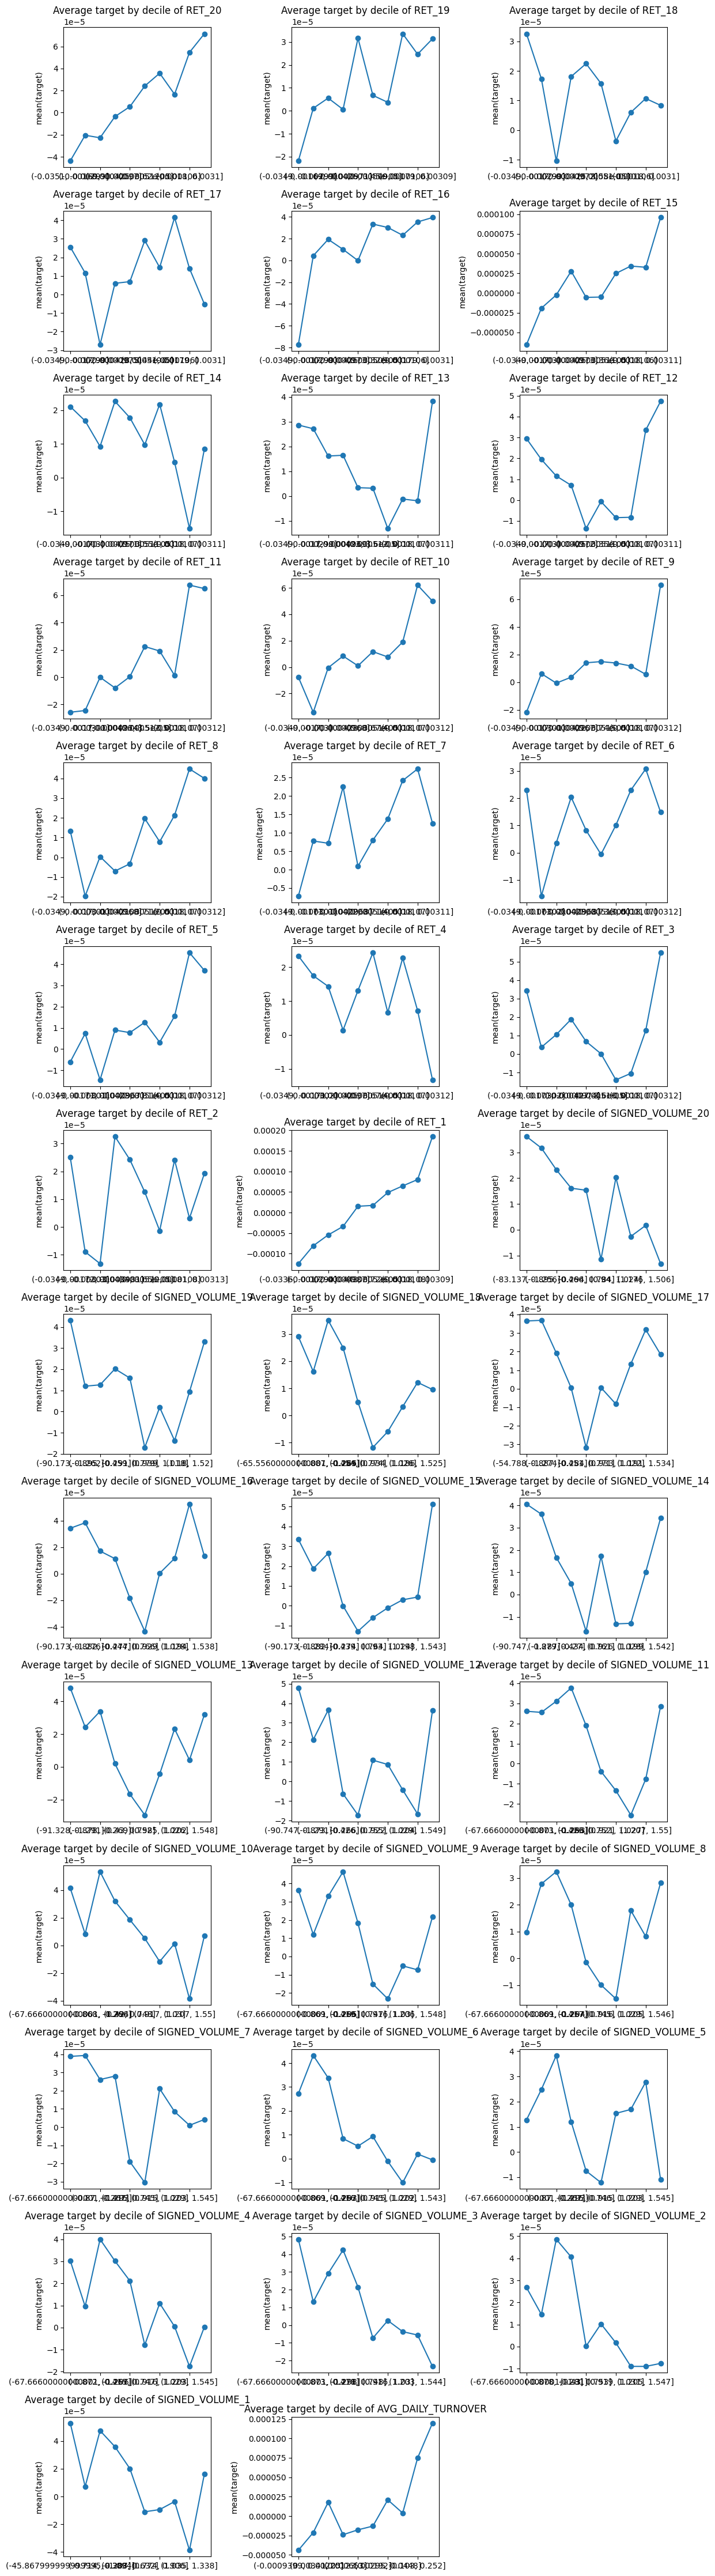

'for i in range(1,21):  \n    train[f"RET_{i}_decile"] = pd.qcut(train[f"RET_{i}"], 10, duplicates=\'drop\')\n    train.groupby(f"RET_{i}_decile")["target"].mean().plot(marker="o")\n    plt.title(f"Moyenne de target par décile de RET_{i}")\n    plt.xlabel(f"Décile de RET_{i}")\n    plt.ylabel("Moyenne de target")\n    plt.show()'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

num_cols = train.select_dtypes(include=[np.number]).columns
features = [c for c in num_cols if c not in ("target", "target_encoded")]

n_cols = 3
n_rows = math.ceil(len(features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3.2 * n_rows))
axes = axes.flatten()

k = 0
for col in features:
    s = pd.to_numeric(train[col], errors="coerce")              # au cas où
    valid = s.notna() & train["target"].notna()

    nunq = s[valid].nunique()
    if nunq < 3:
        continue

    q = min(10, nunq - 1)
    try:
        bins = pd.qcut(s[valid], q=q, duplicates="drop")
        grouped = train.loc[valid].groupby(bins)["target"].mean()

        ax = axes[k]
        grouped.plot(marker="o", ax=ax)
        ax.set_title(f"Average target by decile of {col}")
        ax.set_xlabel("")
        ax.set_ylabel("mean(target)")
        k += 1
    except Exception:
        continue

for j in range(k, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

ici on voit qu'il y a beaucoup de features bruitées (les signed_bolumes par exemple) car le signal n'a pas de tendance particulière

In [85]:
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr


def decile_stats(df, features, target="target", q=10):
    rows = []
    for col in features:
        s = pd.to_numeric(df[col], errors="coerce")
        m = df[target]
        ok = s.notna() & m.notna()
        if ok.sum() < 100:  # pas assez de données propres
            continue
        try:
            bins = pd.qcut(s[ok], q=q, duplicates="drop")
        except Exception:
            continue
        means = df.loc[ok].groupby(bins)[target].mean().values
        if len(means) < 3:
            continue
        lift = means[-1] - means[0]
        # pente (OLS) vs indices 0..len(means)-1
        X = np.arange(len(means)).reshape(-1,1)
        slope = LinearRegression().fit(X, means).coef_[0]
        # Spearman (monotonicité globale)
        rho, _ = spearmanr(s[ok], m[ok])
        rows.append({"feature": col, "lift": lift, "slope": slope, "spearman": rho})
    out = pd.DataFrame(rows).sort_values("lift", ascending=False)
    return out

ranked_cls = decile_stats(train, features, target="target_encoded", q=10)
ranked_cls["ratio"] = ranked_cls["lift"]/9
ranked_cls.head(15)


C:\Users\Ilias\AppData\Local\Temp\ipykernel_16096\1923391841.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.loc[ok].groupby(bins)[target].mean().values
C:\Users\Ilias\AppData\Local\Temp\ipykernel_16096\1923391841.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.loc[ok].groupby(bins)[target].mean().values
C:\Users\Ilias\AppData\Local\Temp\ipykernel_16096\1923391841.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default 

,feature,lift,slope,spearman,ratio
19,RET_1,0.068682,0.007030,0.040942,0.007631
5,RET_15,0.030458,0.002878,0.016767,0.003384
4,RET_16,0.028239,0.001612,0.009987,0.003138
9,RET_11,0.026574,0.002483,0.014370,0.002953
0,RET_20,0.024244,0.002851,0.016381,0.002694
1,RET_19,0.019972,0.001983,0.011579,0.002219
11,RET_9,0.017254,0.001546,0.009062,0.001917
18,RET_2,0.013648,0.001539,0.008803,0.001516
15,RET_5,0.012538,0.001163,0.006909,0.001393
12,RET_8,0.012427,0.002030,0.011359,0.001381


In [115]:
features_retenues = ["RET_1", "AVG_DAILY_TURNOVER", "RET_15", "RET_16", "RET_11", "RET_20", "RET_19", "RET_9", "RET_2", "RET_8", "RET_5", "RET_12", "RET_10", "RET_18", "RET_3"]
features_retenues_bis = RET_features + ["AVG_DAILY_TURNOVER"]

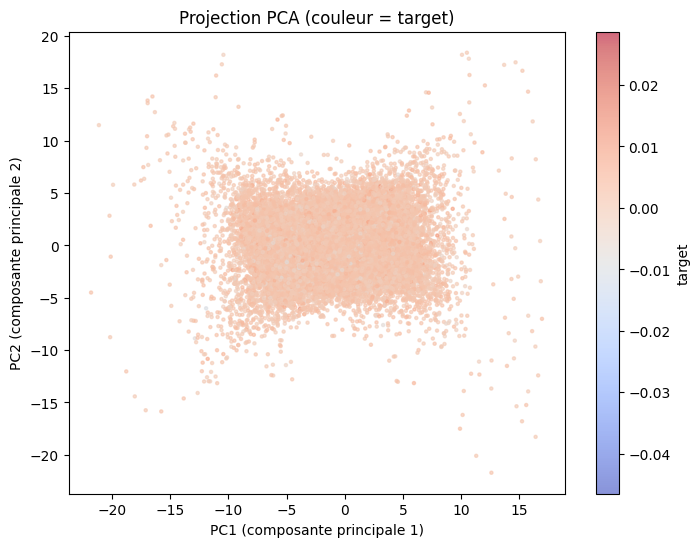

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

features = [f for f in train.columns if f.startswith("RET_") or f.startswith("SIGNED_VOLUME_")]

X = train[features].fillna(0)
X_scaled = StandardScaler().fit_transform(X)

# PCA sur 2 composantes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], 
            c=train["target"], cmap="coolwarm", s=5, alpha=0.6)
plt.xlabel("PC1 (composante principale 1)")
plt.ylabel("PC2 (composante principale 2)")
plt.title("Projection PCA (couleur = target)")
plt.colorbar(label="target")
plt.show()


In [73]:
print("Variance expliquée :", pca.explained_variance_ratio_)


Variance expliquée : [0.0799293  0.07239893]


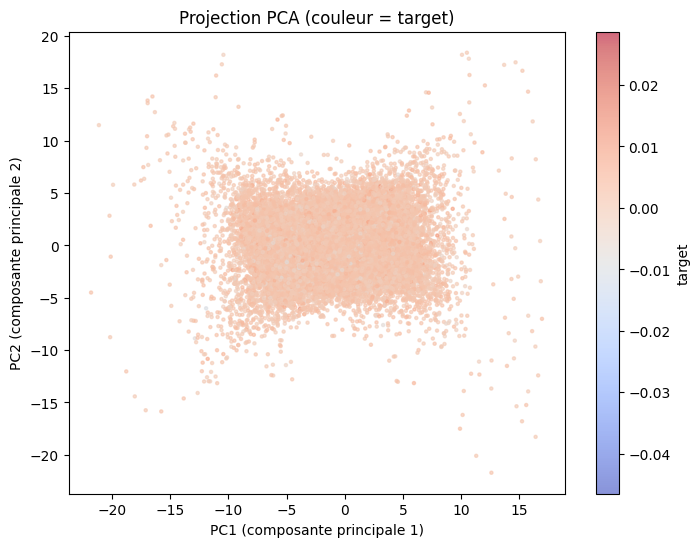

Variance expliquée : [0.23642628 0.04611887 0.03401931 0.03302804 0.03203917 0.03123298
 0.02979612 0.0279159  0.027697   0.02743619 0.02686614 0.026291
 0.02614237 0.02433286 0.02259716 0.02249263 0.0214757  0.02108599
 0.02088528 0.02019883 0.0197526  0.01926574 0.01910665 0.01890667
 0.01665527 0.01442253 0.01305366 0.01173066 0.01087946 0.01014035
 0.0099193  0.00973778 0.00946222 0.00938129 0.00907589]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Standardisation (obligatoire pour la PCA)
X = train[features].fillna(0)
X_scaled = StandardScaler().fit_transform(X)

# PCA sur plus de composantes
pca = PCA(n_components=35)
X_pca = pca.fit_transform(X_scaled)

# Visualisation
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], 
            c=train["target"], cmap="coolwarm", s=5, alpha=0.6)
plt.xlabel("PC1 (composante principale 1)")
plt.ylabel("PC2 (composante principale 2)")
plt.title("Projection PCA (couleur = target)")
plt.colorbar(label="target")
plt.show()

print("Variance expliquée :", pca.explained_variance_ratio_)


In [104]:
import numpy as np
corrs = [np.corrcoef(X_pca[:, i], train["target"])[0, 1] for i in range(35)]
print("Corrélation target vs PC1..5 :", np.argmax(np.abs(corrs)))


Corrélation target vs PC1..5 : 13


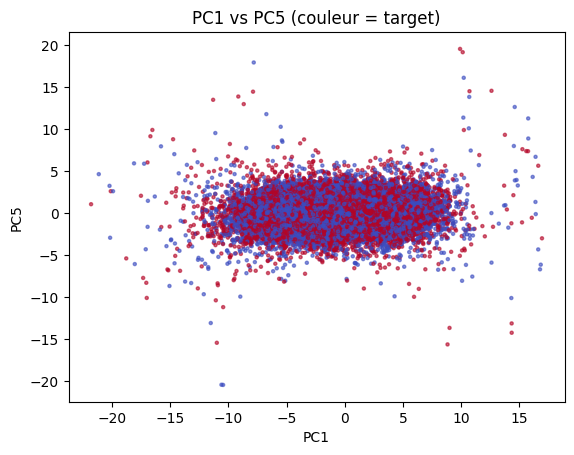

In [62]:
plt.scatter(X_pca[:, 0], X_pca[:, 4], c=train["target_encoded"], cmap="coolwarm", s=5, alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC5")
plt.title("PC1 vs PC5 (couleur = target)")
plt.show()


<h2>III- Feature Engineering - Recherche de features</h2>

Ici, on va essayer un premier algo (à optimiser), puis on verra si l'ajout de features dérivées aide à augmenter l'accuracy

In [25]:
"""# 1) Encodages séparés
from sklearn.preprocessing import LabelEncoder
le_alloc= LabelEncoder()
train["Allocation_ENC"] = le_alloc.fit_transform(train["ALLOCATION"])

# 2) Matrice X 100% numérique (pas de NaN)
X_train1 = train[features_retenues].copy()
X_train1["PC5"] = X_pca[:, 4]
X_train1["Allocation_ENC"] = train["Allocation_ENC"]
X_train1 = X_train1.apply(pd.to_numeric, errors="coerce").fillna(0)

# 3) y = vecteur 1D numpy (pas Series/DataFrame)
y_train1 = train["target_encoded"].astype(int).to_numpy().ravel()

print(X_train1.shape, y_train1.shape)  # (n_samples, n_features) et (n_samples,)"""


'# 1) Encodages séparés\nfrom sklearn.preprocessing import LabelEncoder\nle_alloc= LabelEncoder()\ntrain["Allocation_ENC"] = le_alloc.fit_transform(train["ALLOCATION"])\n\n# 2) Matrice X 100% numérique (pas de NaN)\nX_train1 = train[features_retenues].copy()\nX_train1["PC5"] = X_pca[:, 4]\nX_train1["Allocation_ENC"] = train["Allocation_ENC"]\nX_train1 = X_train1.apply(pd.to_numeric, errors="coerce").fillna(0)\n\n# 3) y = vecteur 1D numpy (pas Series/DataFrame)\ny_train1 = train["target_encoded"].astype(int).to_numpy().ravel()\n\nprint(X_train1.shape, y_train1.shape)  # (n_samples, n_features) et (n_samples,)'

In [26]:
"""X_train1["RET_MEAN_5"] = train[[f"RET_{i}" for i in range(1,6)]].mean(axis=1)
X_train1["RET_STD_5"] = train[[f"RET_{i}" for i in range(1,6)]].std(axis=1)
X_train1["RET_RATIO_5_20"] = (
    train[[f"RET_{i}" for i in range(1,6)]].mean(axis=1) /
    (train[[f"RET_{i}" for i in range(6,21)]].mean(axis=1) + 1e-8)
)

X_train1["TS_ENC"] = X_train["TS"].str.extract(r"(\d+)").astype(int)

X_train1["SV_MEAN_5"] = X_train[[f"SIGNED_VOLUME_{i}" for i in range(1,6)]].mean(axis=1)
X_train1["SV_STD_5"] = X_train[[f"SIGNED_VOLUME_{i}" for i in range(1,6)]].std(axis=1)
X_train1["SV_RATIO_5_20"] = (
    train[[f"SIGNED_VOLUME_{i}" for i in range(1,6)]].mean(axis=1) /
    (train[[f"SIGNED_VOLUME_{i}" for i in range(6,21)]].mean(axis=1) + 1e-8)
)
for i in [3,5,10,15,20]:
    X_train1[ f'AVERAGE_PERF_{i}'] = train[RET_features[:i]].mean(1)
    X_train1[ f'ALLOCATIONS_AVERAGE_PERF_{i}'] = train.groupby('TS')[ f'AVERAGE_PERF_{i}'].transform('mean')"""

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Ilias\AppData\Local\Temp\ipykernel_16096\625917548.py:1: SyntaxWarning: invalid escape sequence '\d'
  """X_train1["RET_MEAN_5"] = train[[f"RET_{i}" for i in range(1,6)]].mean(axis=1)


'X_train1["RET_MEAN_5"] = train[[f"RET_{i}" for i in range(1,6)]].mean(axis=1)\nX_train1["RET_STD_5"] = train[[f"RET_{i}" for i in range(1,6)]].std(axis=1)\nX_train1["RET_RATIO_5_20"] = (\n    train[[f"RET_{i}" for i in range(1,6)]].mean(axis=1) /\n    (train[[f"RET_{i}" for i in range(6,21)]].mean(axis=1) + 1e-8)\n)\n\nX_train1["TS_ENC"] = X_train["TS"].str.extract(r"(\\d+)").astype(int)\n\nX_train1["SV_MEAN_5"] = X_train[[f"SIGNED_VOLUME_{i}" for i in range(1,6)]].mean(axis=1)\nX_train1["SV_STD_5"] = X_train[[f"SIGNED_VOLUME_{i}" for i in range(1,6)]].std(axis=1)\nX_train1["SV_RATIO_5_20"] = (\n    train[[f"SIGNED_VOLUME_{i}" for i in range(1,6)]].mean(axis=1) /\n    (train[[f"SIGNED_VOLUME_{i}" for i in range(6,21)]].mean(axis=1) + 1e-8)\n)\nfor i in [3,5,10,15,20]:\n    X_train1[ f\'AVERAGE_PERF_{i}\'] = train[RET_features[:i]].mean(1)\n    X_train1[ f\'ALLOCATIONS_AVERAGE_PERF_{i}\'] = train.groupby(\'TS\')[ f\'AVERAGE_PERF_{i}\'].transform(\'mean\')'

<h2>IV - Modélisation</h2>

In [109]:
from sklearn.preprocessing import LabelEncoder
le_alloc= LabelEncoder()

def btp(dff):
    df = dff.copy()
    ret_cols = [f"RET_{i}" for i in range(1, 21)]
    sv_cols  = [f"SIGNED_VOLUME_{i}" for i in range(1, 21)]

    for k in [3,5,10,15,20]:
        df[f"AVERAGE_PERF_{k}"] = df[ret_cols[:k]].mean(axis=1)
        df[f"TS_AVERAGE_PERF_{k}"] = df.groupby("TS")[f"AVERAGE_PERF_{k}"].transform("mean")

    recent_ret = ret_cols[:5]         
    vieux_ret  = ret_cols[5:20]        
    df["RET_MEAN_5"]   = df[recent_ret].mean(axis=1)
    df["RET_STD_5"]    = df[recent_ret].std(axis=1)
    df["RET_RATIO_5_20"]= df[recent_ret].mean(axis=1) / (df[vieux_ret].mean(axis=1) + 1e-8)

    df["TS_ENC"] = df["TS"].str.extract(r"(\d+)").astype(int)
    df["Allocation_ENC"] = le_alloc.fit_transform(df["ALLOCATION"])

    df["RET_POS_COUNT"] = (df[[f"RET_{i}" for i in range(1, 21)]] > 0).sum(axis=1)

    recent_sv = sv_cols[:5]           
    vieux_sv  = sv_cols[5:20]          
    df["SV_MEAN_5"]     = df[recent_sv].mean(axis=1)
    df["SV_STD_5"]      = df[recent_sv].std(axis=1)
    df["SV_RATIO_5_20"] = df[recent_sv].mean(axis=1) / (df[vieux_sv].mean(axis=1) + 1e-8)

    ret_max = df[ret_cols].max(axis=1)
    ret_min = df[ret_cols].min(axis=1).abs() + 1e-8
    df["RET_MAXMIN_RATIO"] = ret_max / ret_min

    sv_max = df[sv_cols].max(axis=1).abs()
    sv_min = df[sv_cols].min(axis=1).abs() + 1e-8
    df["SV_MAXMIN_RATIO"] = sv_max / sv_min

    df["ALLOC_RET_MAXMIN_RATIO_MEAN"] = df.groupby("ALLOCATION")["RET_MAXMIN_RATIO"].transform("mean")
    df["ALLOC_SV_MAXMIN_RATIO_MEAN"]  = df.groupby("ALLOCATION")["SV_MAXMIN_RATIO"].transform("mean")

    return df


['RET_20', 'RET_19', 'RET_18', 'RET_17', 'RET_16', 'RET_15', 'RET_14', 'RET_13', 'RET_12', 'RET_11', 'RET_10', 'RET_9', 'RET_8', 'RET_7', 'RET_6', 'RET_5', 'RET_4', 'RET_3', 'RET_2', 'RET_1', 'SIGNED_VOLUME_20', 'SIGNED_VOLUME_19', 'SIGNED_VOLUME_18', 'SIGNED_VOLUME_17', 'SIGNED_VOLUME_16', 'SIGNED_VOLUME_15', 'SIGNED_VOLUME_14', 'SIGNED_VOLUME_13', 'SIGNED_VOLUME_12', 'SIGNED_VOLUME_11', 'SIGNED_VOLUME_10', 'SIGNED_VOLUME_9', 'SIGNED_VOLUME_8', 'SIGNED_VOLUME_7', 'SIGNED_VOLUME_6', 'SIGNED_VOLUME_5', 'SIGNED_VOLUME_4', 'SIGNED_VOLUME_3', 'SIGNED_VOLUME_2', 'SIGNED_VOLUME_1', 'AVERAGE_PERF_3', 'AVERAGE_PERF_5', 'AVERAGE_PERF_10', 'AVERAGE_PERF_15', 'AVERAGE_PERF_20', 'TS_AVERAGE_PERF_3', 'TS_AVERAGE_PERF_5', 'TS_AVERAGE_PERF_10', 'TS_AVERAGE_PERF_15', 'TS_AVERAGE_PERF_20', 'RET_MEAN_5', 'RET_STD_5', 'RET_RATIO_5_20', 'SV_MEAN_5', 'SV_STD_5', 'SV_RATIO_5_20', 'Allocation_ENC', 'RET_MAXMIN_RATIO', 'SV_MAXMIN_RATIO', 'ALLOC_RET_MAXMIN_RATIO_MEAN', 'ALLOC_SV_MAXMIN_RATIO_MEAN', 'RET_POS_CO

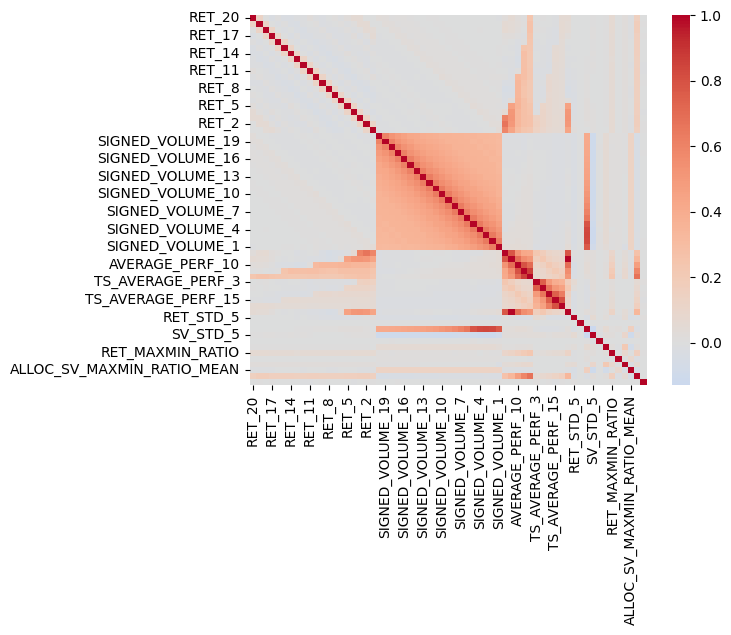

In [120]:
feature_set = features_retenues + [
    *[f"AVERAGE_PERF_{k}" for k in [3,5,10,15,20]],
    *[f"TS_AVERAGE_PERF_{k}" for k in [3,5,10,15,20]],
    "RET_MEAN_5","RET_STD_5","RET_RATIO_5_20",
    "SV_MEAN_5","SV_STD_5","SV_RATIO_5_20", "Allocation_ENC", "RET_MAXMIN_RATIO", "SV_MAXMIN_RATIO",
    "ALLOC_RET_MAXMIN_RATIO_MEAN", "ALLOC_SV_MAXMIN_RATIO_MEAN",
    "RET_POS_COUNT", "TS_ENC"
]

feature_set_bis = features + [
    *[f"AVERAGE_PERF_{k}" for k in [3,5,10,15,20]],
    *[f"TS_AVERAGE_PERF_{k}" for k in [3,5,10,15,20]],
    "RET_MEAN_5","RET_STD_5","RET_RATIO_5_20",
    "SV_MEAN_5","SV_STD_5","SV_RATIO_5_20", "Allocation_ENC", "RET_MAXMIN_RATIO", "SV_MAXMIN_RATIO",
    "ALLOC_RET_MAXMIN_RATIO_MEAN", "ALLOC_SV_MAXMIN_RATIO_MEAN",
    "RET_POS_COUNT", "TS_ENC"
]


sns.heatmap(btp(X_train)[feature_set_bis].corr(), cmap="coolwarm", center=0)
print(feature_set_bis)

In [29]:
X_train_bis = btp(X_train)  
X_train_final = X_train_bis[feature_set].apply(pd.to_numeric, errors="coerce").fillna(0)
X_train_final["PC5"] = X_pca[:, 4]
y_train1 = train["target_encoded"].astype(int).to_numpy().ravel()
X_train_final

,RET_1,AVG_DAILY_TURNOVER,RET_15,RET_16,RET_11,RET_20,RET_19,RET_9,RET_2,RET_8,...,SV_STD_5,SV_RATIO_5_20,Allocation_ENC,RET_MAXMIN_RATIO,SV_MAXMIN_RATIO,ALLOC_RET_MAXMIN_RATIO_MEAN,ALLOC_SV_MAXMIN_RATIO_MEAN,RET_POS_COUNT,TS_ENC,PC5
ROW_ID,,,,,,,,,,,,,,,,,,,,,
0,0.001061,0.054324,-0.000685,-0.000152,-0.000550,-0.002477,0.004826,0.005982,0.004822,0.004649,...,0.424020,1.074880,0,0.920239,0.005870,1.164172,78.586022,8,1,0.442036
1,-0.004908,0.015669,0.003056,-0.002638,-0.001570,0.006863,-0.005265,-0.004923,-0.002027,-0.003448,...,0.471720,0.757457,1,1.301178,66.087112,1.159766,12380.119680,10,1,0.157376
2,0.005701,0.057961,-0.000848,0.004679,0.000409,-0.005535,0.008541,0.010256,0.004401,0.007214,...,0.173806,1.091687,2,1.131046,0.018350,1.149768,321.592560,11,1,1.099786
3,-0.004157,0.096004,0.000627,-0.005659,-0.000078,0.003178,-0.001352,0.000203,-0.003769,-0.002306,...,0.499931,0.726169,3,0.968176,0.009898,1.116200,11.481879,9,1,0.203637
4,-0.001481,0.005816,0.000913,-0.003533,0.000459,0.003359,-0.003349,-0.003426,-0.001688,-0.002329,...,0.753322,-0.687837,4,0.931840,1.427128,1.155978,119.363217,9,1,-0.645960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180240,0.000424,0.266275,-0.000919,0.001114,0.002050,0.002236,-0.000891,0.000394,0.001120,0.000476,...,0.453501,0.633123,60,1.116053,0.056007,1.364545,554.516034,13,2773,0.326948
180241,-0.003960,0.013269,0.002425,-0.000569,-0.001162,0.001811,0.003863,-0.000632,0.001261,0.001618,...,0.554802,0.829448,61,0.814201,342.091841,1.174937,127.166270,11,2773,1.281387
180242,-0.000682,0.148806,-0.001503,0.001426,0.001904,0.001063,-0.000599,-0.000228,0.000228,-0.001625,...,0.474023,0.792271,62,1.061898,0.067861,1.225431,1323.538470,8,2773,0.036051


Meilleurs hyperparamètres : {'subsample': 0.8, 'reg_lambda': 20, 'reg_alpha': 10, 'n_estimators': 300, 'min_child_weight': 16, 'max_depth': 4, 'learning_rate': 0.02, 'colsample_bytree': 0.8}
Meilleure accuracy CV : 0.5413021065008787

C:\Users\Ilias\AppData\Local\Temp\ipykernel_16096\632285718.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],


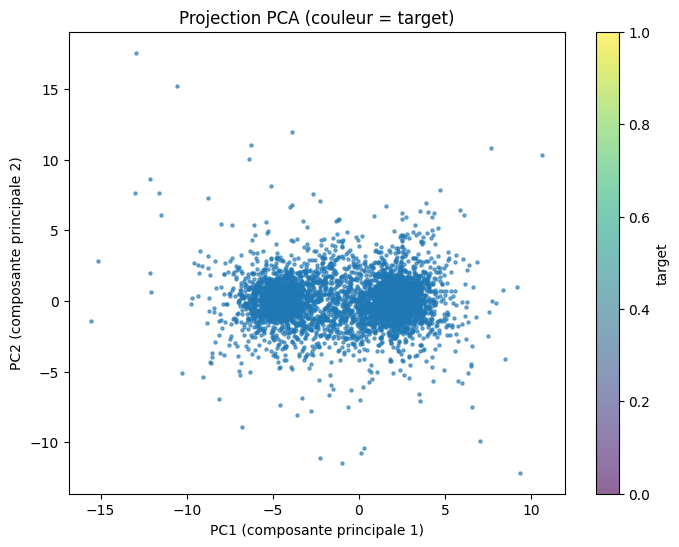

Variance expliquée : [0.23642628 0.04611887 0.03401931 0.03302804 0.03203917 0.03123298
 0.02979612 0.0279159  0.027697   0.02743619 0.02686614 0.026291
 0.02614237 0.02433286 0.02259716 0.02249263 0.0214757  0.02108599
 0.02088528 0.02019883 0.0197526  0.01926574 0.01910665 0.01890667
 0.01665527 0.01442253 0.01305366 0.01173066 0.01087946 0.01014035
 0.0099193  0.00973778 0.00946222 0.00938129 0.00907589]


In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Standardisation (obligatoire pour la PCA)
X1 = X_test[features].fillna(0)
X_test_scaled = StandardScaler().fit_transform(X1)

# PCA sur 2 composantes
pca_test = PCA(n_components=35)
X_test_pca = pca_test.fit_transform(X_test_scaled)

# Visualisation
plt.figure(figsize=(8,6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], 
             cmap="coolwarm", s=5, alpha=0.6)
plt.xlabel("PC1 (composante principale 1)")
plt.ylabel("PC2 (composante principale 2)")
plt.title("Projection PCA (couleur = target)")
plt.colorbar(label="target")
plt.show()

print("Variance expliquée :", pca.explained_variance_ratio_)


A chaque fois, la 5ème composante explique moins de variance que les précédentes mais, étant donné le gros bruit présent (marché financier), c'est la composante la plus correlée à la target. C'est pourquoi, ici, je fais le choix de ne garder que cette composante.

In [125]:

train_dates = X_train['TS'].unique()
test_dates = X_test['TS'].unique()

n_splits = 5
scores = []
models = []
 
splits = KFold(n_splits=n_splits, random_state=0,
               shuffle=True).split(train_dates)

for i, (local_train_dates_ids, local_test_dates_ids) in enumerate(splits):
    local_train_dates = train_dates[local_train_dates_ids]
    local_test_dates = train_dates[local_test_dates_ids]

    local_train_ids = X_train['TS'].isin(local_train_dates)
    local_test_ids = X_train['TS'].isin(local_test_dates)

    X_train_final_ridge = btp(X_train)[feature_set]
    X_train_final_ridge["PC6"] = X_pca[:,5]
    X_test_final_ridge = btp(X_test)[feature_set]
    X_test_final_ridge["PC6"] = X_test_pca[:,5]


    X_local_train = X_train_final_ridge.loc[local_train_ids,feature_set + ["PC6"]]
    y_local_train = y_train.loc[local_train_ids,'target']
    X_local_test = X_train_final_ridge.loc[local_test_ids,feature_set + ["PC6"]]
    y_local_test = y_train.loc[local_test_ids,'target']

    X_local_train = X_local_train.fillna(0)
    X_local_test = X_local_test.fillna(0)

    model = linear_model.Ridge(alpha=1e-2, fit_intercept=False)
    model.fit(X_local_train, y_local_train)

    y_local_pred = model.predict(X_local_test)
    
    models.append(model)
    score = accuracy_score((y_local_test>0).astype(int),
                (y_local_pred>0).astype(int))
    scores.append(score)
    print(f"Fold {i+1} - Accuracy: {score* 100:.2f}%")

mean = np.mean(scores)*100
std = np.std(scores)*100
u = (mean + std)
l = (mean - std)
print(f'Accuracy: {mean:.2f}% [{l:.2f} ; {u:.2f}] (+- {std:.2f})')


c:\miniconda\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.26238e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fold 1 - Accuracy: 51.60%


c:\miniconda\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.30736e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fold 2 - Accuracy: 52.04%


c:\miniconda\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.58564e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fold 3 - Accuracy: 52.24%


c:\miniconda\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.31358e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fold 4 - Accuracy: 51.91%
Fold 5 - Accuracy: 52.25%
Accuracy: 52.01% [51.76 ; 52.25] (+- 0.24)


c:\miniconda\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.79751e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


features sélectionnées, sans PCA, avec TS : 52.01% (+- 0.25)

features sélectionnées, avec PCA (sur retenues), avec TS : 51.99% (+- 0.24)

toutes features, avec PCA (sur retenues), avec TS : 51.91% (+- 0.33)

toutes features, sans PCA, avec TS : 51.91% (+- 0.33)

features sélectionnées, avec PCA (sur tout), avec TS : 52.01% (+- 0.24)



In [ ]:
X_train_final_ridge = btp(X_train)[feature_set]
X_train_final_ridge["PC6"] = X_pca[:, 5]
X_test_final_ridge = btp(X_test)[feature_set]
X_test_final_ridge["PC6"] = X_test_pca[:, 5]

new_ridge = linear_model.Ridge(alpha=1e-2, fit_intercept=False)

new_ridge.fit(X_train_final_ridge.to_numpy(na_value=0),y_train.to_numpy(na_value=0))

preds_ridge = pd.DataFrame(new_ridge.predict(X_test_final_ridge.fillna(0).to_numpy(na_value=0)), index = sample_submission.index,columns=['target'])

(preds_ridge>0).astype(int).to_csv('ridge_submission.csv')

c:\miniconda\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.0588e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
